(0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0)


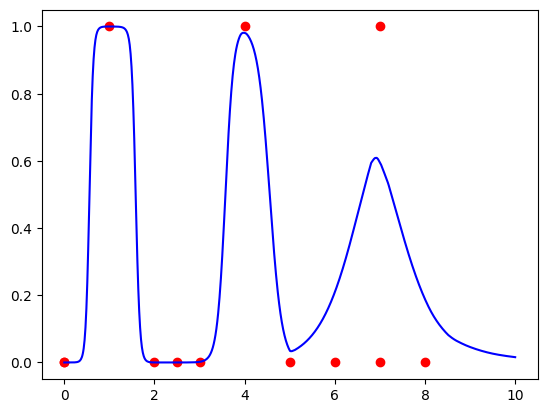

In [202]:
import matplotlib.pyplot as plt
import numpy as np

# x = [1, 2, 3, 4, 5, 6]
# y = [1, 0, 0, 1, 0, 0]

Z = [
    [0, 0],
    [0, 0],
    [1, 1],
    [2, 0],
    [2.5, 0],
    [3, 0],
    [4, 1],
    [5, 0],
    # [5, 1],
    [6, 0],
    [7, 0],
    [7, 1],
    [8, 0],
]
x, y = zip(*Z)
print(y)

plt.plot(x, y, "ro")

# fit gaussian process

X = np.array(x).reshape(-1, 1)
Y = np.array(y)
kernel = C(5.0, (1, 30)) * RBF(15, (1e-1, 30))
# gp = GaussianProcessClassifier(kernel=kernel, n_restarts_optimizer=10)
from sklearn.neural_network import MLPClassifier

cls = MLPClassifier(
    hidden_layer_sizes=(512, 256, 128),
    max_iter=1000000,
    activation="relu",
    alpha=0.0001,
)
# polynomial logistic regression
# from sklearn.linear_model import LogisticRegression
# cls = LogisticRegression(C=1e5, solver="lbfgs")
cls.fit(X, Y)

x_pred = np.linspace(0, 10, 1000).reshape(-1, 1)
y_pred = cls.predict_proba(x_pred)[:, 1]

plt.plot(x_pred, y_pred, "b-")


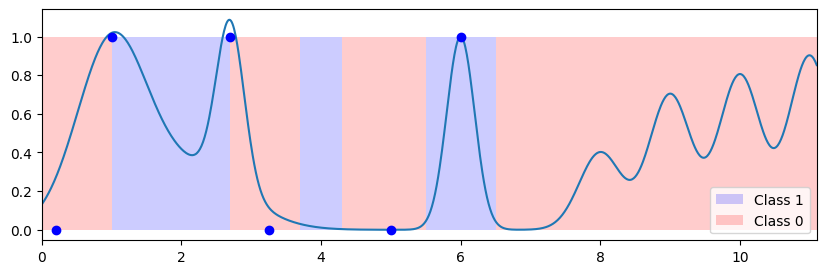

In [346]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2) / (2 * np.power(sig, 2)))


def f(x):
    params = [
        (0.95, 1, 0.5),
        (0.85, 2.7, 0.2),
        (0.3, 2.2, 0.7),
        (1, 6, 0.2),
        (0.4, 8, 0.3),
        (0.7, 9, 0.3),
        (0.8, 10, 0.3),
        (0.9, 11, 0.3),
        # (0.6, 4, 0.3),
    ]
    # return 0.5 * gaussian(x, 2, 0.5) + 0.5 * gaussian(x, 7, 0.5)
    return sum([a * gaussian(x, mu, sig) for a, mu, sig in params])


training_samples = [
    (0.2, 0),
    (1, 1),
    (2.7, 1),
    (3.25, 0),
    (5, 0),
    (6, 1),
]

plt.figure(figsize=(10, 3))
x = np.linspace(0, 11.1, 1000)
y = f(x)
plt.plot(
    x,
    y,
)

plt.plot(*zip(*training_samples), "bo")


# shade between vertical lines
plt.fill_betweenx([0, 1], 1, 2.7, color="b", alpha=0.2, lw=0, label="Class 1")
plt.fill_betweenx([0, 1], 3.7, 4.3, color="b", alpha=0.2, lw=0)
plt.fill_betweenx([0, 1], 5.5, 6.5, color="b", alpha=0.2, lw=0)

plt.fill_betweenx([0, 1], 0, 1, color="r", alpha=0.2, lw=0, label="Class 0")
plt.fill_betweenx([0, 1], 2.7, 3.7, color="r", alpha=0.2, lw=0)
plt.fill_betweenx([0, 1], 4.3, 5.5, color="r", alpha=0.2, lw=0)
plt.fill_betweenx([0, 1], 6.5, 11.1, color="r", alpha=0.2, lw=0)
plt.xlim(0, 11.1)

plt.legend()

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X, y)
gaussian_process.kernel_

/Users/philipp/.virtualenvs/base/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:477: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(


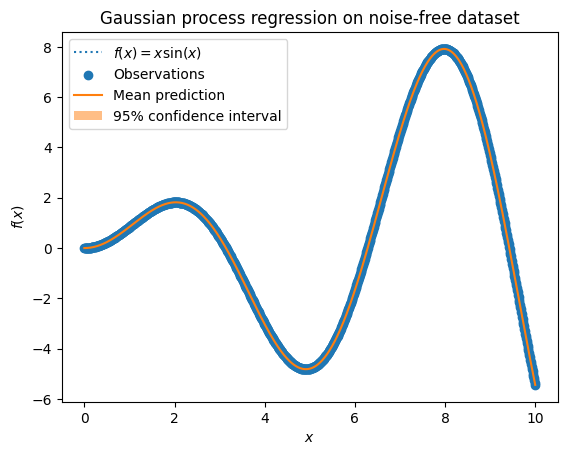

In [99]:
mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)

plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(X, y, label="Observations")
plt.plot(X, mean_prediction, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on noise-free dataset")